# Chapter 30. CAPM 과 재정가격결정이론 (The Capital Asset Pricing Model and Arbitrage Pricing Theory)


Capital Asset Pricing Model (CAPM) 은 자본비용 측정의 고전적 방식이다. 

CAPM 은 asset 의 가격 평가와 전체적인 시장 risk premium 의 impact 을 평가에 주로 사용된다. 여기서는 여러가지 요인에 관련된 risk 평가의 기초가 되는 CAPM 과 더 일반적인 APT(Arbitrage Pricing Theory) 에 대해 알아본다. 

* cost of capital(자본비용) : 기업이 자본을 조달하여 사용하는 것과 관련해 부담해야 하는 비용
* Arbitrage Pricing Theory : S. A. Ross가 제창한 것으로 자산의 수익률이 다수의 공통요인들에 의하여 영향을 받으며 결정된다는 이론으로서 자산수익률과 요인들과의 선형결합에 의하여 표시할 수 있다는 것이다

In [144]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels import regression
import matplotlib.pyplot as plt

## Idiosyncratic and Systematic Risk

일반적으로 포트폴리오와 자산들은 두가지 타입의 risk 에 직면한다 : idiosyncratic and systematic risk.
**Idiosyncratic risk** 는 경영진 변화 혹은 생산 차질등 특정 회사차원의 risk 이고 다양화를 통해 분산될 수 있다. 반면  **systematic risk** 는 시장 차원의 risk 이므로 모든 시장 참가자에게 영향을 준다. 예를 들면 경기 하강, 이자율 변화 등이다. 모든 회사들이 시스템적 risk 에 노출되어 있으므로 시스템 risk 는 분산시킬 수 없다.

## Risk Premia

포트폴리오의 자산 숫자가 늘어나면 많은 개별 주식 risk 가 상쇄되거나 분산화된다. 이 때문에  [position concentration risk](https://www.quantopian.com/lectures/position-concentration-risk) 를 회피하려는 것이다.
포트폴리오 사이즈가 커지면 더 다양한 독립적 betting 이 되고 포트폴리오의 variance 는 감소되어 시스템적 risk 만 남게 된다. 

system risk 는 제거할 수 없으므로, 투자자들에게는 해당 포트폴리오에 투자함으로서 take 하는 risk 에 대한 보상으로서, risk-free return rate 이상의 risk premium 이 지급된다. 포트폴리오 내의 개별 회사 차원의 risk 는 그에 관련된 프리미엄이 없는데 그 이유는 개별 주식에 프리미엄을 주면 차익거래 기회가 생기기 때문이다. Shareholders could collect the risk premium while diversifying away the risk associated with them. That would mean additional profit without any additional exposure. This is the definition of an arbitrage opportunity!

이같은 이유로 특정 자산에 대한 premium 은 그 자산의 idiosyncratic risk 와는 관련이 없어야 하고 대신 그 것이 수반하는 시스템 리스크 수준에만 의존한다고 결론낼 수 있다. 어떤 자산의 risk premium 과 그에 따르는 기대 수익을 정확히 계산하기 위해 시스템적 risk 를 측정하는 수단을 찾아야 한다.
그 방법을 알면, 다음과 같은 방법으로 asset 의 return 을 이론적으로 정의할 수 있다.

$$E[\mbox{Return}] = \mbox{Risk-Free Rate of Return} + \mbox{Risk Premium}$$


한가지 방법은 asset 의 잉여수익 변화가 시장 잉여 수익의 변화와 어떻게 관련되는지 추정하는 것이다.

이것을 linear regression 으로 표현하면 시장 포트폴리오가 1% 변할 때 asset 의 기대 수익 변화 관계를 파악할 수 있다.

이론상, 시장 포트폴리오는 분산할 risk 가 남아있지 않으므로 시스템적 충격에 의해서만 fluctuate 한다. 실제로는 우리는 S&P500 과 같은 market index 를 마켓포트폴리오의 proxy 로 사용한다. market 의 return 에 따른 asset 의 return 으로 regressing 해 얻은 beta 는 시스템 risk 의 측정치가 된다. 이 beta 는 시장에 대한 충격에 대해 asset 의 return stream 의 민감도를 표현한다.

이 beta 를 가지고 , asset 의 risk premium(투자자가 위험을 감수함으로서 얻는 기대 수익) 은 다음과 같이 정의된다.

$$\mbox{Risk Premium of Asset}_i = \beta (\mbox{Market Risk Premium})$$

이 가장 간단한 모델을 Capital Asset Pricing Model (CAPM) 이라고 부른다.

## Capital Asset Pricing Theory

CAPM 을 다음과 같이 더 명확히 정의할 수 있다:

$$E[R_i] = R_F + \beta(E[R_M] - R_F)$$

여기서 $R_i$ 는 asset $i$ 의 return 이고, $R_F$ 는 risk-free rate 이며, $R_M$ 은 market 의 return 이다. CAPM 은 자본 비용 (cost of capital) 의 가장 기본적 측정 방법이다. 투자자가 어떠한 자산을 보유하는데 필요한 최소 return 을 정한다. 

다른 말로 하면, CAPM 은 어떤 asset 의 return 은 우리가 inflation 과 돈의 시간 가치를 감안한 risk-free rate 에 우리가 시스템 risk 에 노출시킨 금액을 보상할 수 있는 어떤 추가적인 rate 를 더한 것이라는 의미이다. 

또 다른 말로 하면, risk free return 을 상회하는 특정 위험 자산의 기대수익 $E[R_i]$ 는 그 자신의 market portfolio 에 대한 민감도 ($\beta$ X 예상 market risk premium)  이다.

## $\beta$ 는 어떻게 측정 ?

$$ \beta_i = \frac{COV(r_i, r_m)}{\sigma_m^2}$$
여기서, $COV(r_i, r_m)$ = 위험자산의 return 과 market portfolio return 의 covariance, $\sigma_m^2$ = market portfolio return 의 variance

regression.linear_model.OLS(endog , exog) : 

endog : 1-d endogenous variable (내생변수, 종속변수, 결과) --> R - R_F (251, 1)

edog (외생변수, 원인)   --> sm.add_constant(M) : (251, 2)

fit() method returns RegressionResults class instance

아래 예는 2014 년의 apple 주식의 일일 수익률과 T-Bill (risk free rate) 의 차이를 종속변수로 하고, S&P500 의 일일 수익률을 독립변수로 하여 S&P500 의 수익률 변화에 대한 apple 주식 수익률변화를 linear regression 하여 market 에 대한 apple 주식의 beta 를 구한 것이다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     57.60
Date:                Sun, 29 Apr 2018   Prob (F-statistic):           6.43e-13
Time:                        10:35:38   Log-Likelihood:                 748.88
No. Observations:                 251   AIC:                            -1494.
Df Residuals:                     249   BIC:                            -1487.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.334      0.183      -0.000       0.003
.INX_Close     0.8261      0.109      7.589      0.000       0.612       1.040
==============================================================================
Omnibus:                       75.221   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2526.558
Skew:                          -0.327   Prob(JB):                         0.00
Kurtosis:                      18.529   Cond. No.                         140.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

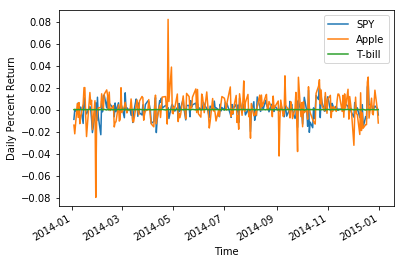

In [145]:
from googlefinance.client import get_price_data, get_prices_data
import pandas as pd

start = pd.to_datetime('2014-01-01')
end = pd.to_datetime('2015-01-01')   

df = pd.DataFrame(get_price_data({'q': "AAPL", 'i': "86400", 'x': "NASD", 'p': "10Y" }))['Close'].loc[start : end]
df.index = pd.to_datetime(df.index.date)

R = df.pct_change()[1:]

df = pd.DataFrame(get_price_data({'q': "BIL", 'i': "86400", 'x': "NYSEARCA", 'p': "10Y" }))['Close'].loc[start : end]  # T-Bill
df.index = pd.to_datetime(df.index.date)
# risk-free proxy
R_F = df.pct_change()[1:]

# find it's beta against market
start = pd.to_datetime('2014-01-01')
end = pd.to_datetime('2014-12-31')   
df = get_prices_data( [{'q': ".INX", 'x': "INDEXSP",}], "10Y")    
df.index = pd.to_datetime(df.index)
df = df['.INX_Close'].loc[start:end]

M =  df.pct_change()[1:]             # SPY return rate

AAPL_results = regression.linear_model.OLS(R-R_F, sm.add_constant(M)).fit()    # linear regression of (AAPL - T-Bill) against SPY
AAPL_beta = AAPL_results.params[1]           # market 에 대한 apple 의 beta

M.plot(label='SPY')
R.plot(label='Apple')
R_F.plot(label='T-bill')
plt.xlabel('Time')
plt.ylabel('Daily Percent Return')
plt.legend();

AAPL_results.summary()

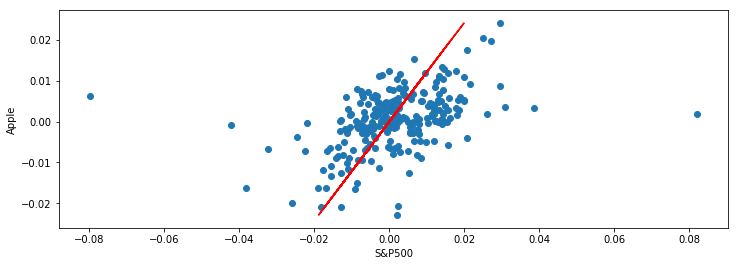

In [146]:
E_AAPL = R_F + AAPL_beta * (M - R_F)
plt.figure(figsize=(12,4))
plt.plot(E_AAPL, M, color='r')
plt.scatter(R, M)
plt.xlabel('S&P500')
plt.ylabel('Apple');

SPY 에 대한 AAPL  의 beta exposure 를 구했으므로 SPY 변화에 대한 APPLE 의 return 의 예측을 할 수 있다.

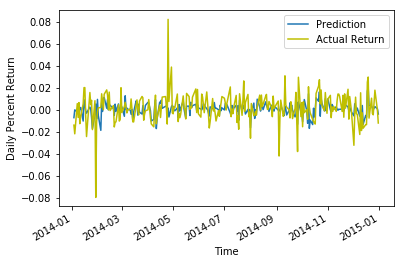

In [147]:
predictions = R_F + AAPL_beta*(M - R_F) # CAPM equation

predictions.plot()
R.plot(color='Y')
plt.legend(['Prediction', 'Actual Return'])

plt.xlabel('Time')
plt.ylabel('Daily Percent Return');

## CAPM Assumptions

CAPM 도출에 다음 두가지의 주요 가정을 하였음.

* 투자자들이 delay 난 비용없이 거래할 수 있고 모든 사람들이 risk free rate 로 돈을 빌리거나 빌려줄 수 있음

* 투자자들은 "mean-variance optimizer 들" 이라 가정. 의미는 투자자들이 주어진 risk 수준에서 가장 높은 return 을 제공하는 포트폴리오들 만을 요구한다는 뜻임. 이러한 포트폴리오들을 "효율적 프론티어 (**efficient frontier**) 라고 함.

다음은 Markowitz portfolio optimization 을 cvxopt library, scipy.optimize 및 Monte Carlo Simulation 을 이용하여 4 가지 asset 으로 구성된 포트폴리오에 대한 효율적 프론티어의 도출이다. 이론적 concept 의 이해를 위해 우선 random data 로 먼저 시작하고 뒤에 실제 data 를 적용해 본다.

In [148]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
import cvxopt as opt                      # python 3.5 에서 working
from cvxopt import blas, solvers     # interface to the double-precision real and complex Basic Linear Algebra Subprograms (BLAS) 

4 개의 asset 으로 구성된 portfolio 를 가정. 각각의 asset 은 길이 1000 의 series of return 으로 구성. numpy.random.rand 을 이용하여 normally distribute(mean 0, std 1) 된 sample returns 를 생성할 수 있다.

In [149]:
np.random.seed(123)

# Turn off progress printing 
solvers.options['show_progress'] = False

# Number of assets
n_assets = 4

# Number of return observations
n_obs = 1000

## Generating random returns for our 4 assets
return_vec = np.random.randn(n_assets, n_obs)        # (4, 200) 의 standsrd normal distribution (mean 0, std 1)

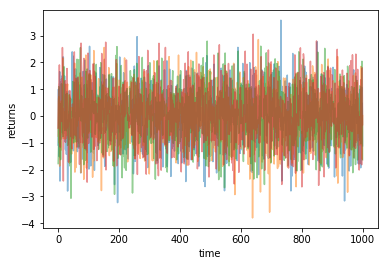

In [150]:
plt.plot(return_vec.T, alpha=0.5)
plt.xlabel('time')
plt.ylabel('returns');

위에서 생성한 return series 는 서로 다른 return 과 risk(standard deviation) 를 가진 다양한 portfolio들의 생성에 사용될 수 있다. 광범위한 random weight vector 를 생성해서 이들 portfolio 들을 plot 할 수 있다. 전체 자본을 투자한다고 가정하므로 weight vectors 의 합은 1 이 되어야 한다.

In [151]:
def rand_weights(n):
    ''' 
    Produces n random weights that sum to 1 
    '''
    k = np.random.rand(n)
    return k / sum(k)          

print(rand_weights(n_assets))
print(rand_weights(n_assets))

[ 0.54066805  0.2360283   0.11660484  0.1066988 ]
[ 0.27638339  0.03006307  0.47850085  0.21505269]


위에서 생성한 asset 별 returns series 를 가지고 random 하게 생성시킨 asset 별 weight 를 조합하여 portfolio 를 구성하고 평가해 본다. 이를 위해 각 portfolio 의 mean return 과 volatility (standard deviation) 을 계산하는 함수를 만든다. random 하게 생성된 portfolio 중 std > 2 인 것들은 illustration 에 도움되지 않으므로 제외시킨다.

In [152]:
def random_portfolio(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''

    p = np.asmatrix(np.mean(returns, axis=1))             # portfolio 평균 return [[-0.01558748  0.03841589  0.02064674 -0.00443687]]
    w = np.asmatrix(rand_weights(returns.shape[0]))   # portfolio 자산들의 weight vector [[ 0.38245143  0.17489763  0.18194366  0.26070729]]
    C = np.asmatrix(np.cov(returns))                           # 4 X 4  portfolio 내 자산들의 covariance
    
    mu = w * p.T                                                        # w 비중으로 구성된 portfolio p 의 평균  return  ex. [[ 0.00461441]]
    sigma = np.sqrt(w * C * w.T)                                 # 표준편차 [[ 0.53947116]] 는 
    
    # This recursion reduces outliers to keep plots pretty
    if sigma > 2:                                                         #  sigma < 2 가 될 때까지 recursive
        return random_portfolio(returns)

    return mu, sigma                                                  # portfolio 의 평균과 표준편차를 계산하여 return


위 코드에서 return 의 계산은, $$R = p^Tw$$

여기서 R 은 expected return, $p^T$ 는 각 asset time series 에 대한 평균 return 의 transpose vector 이고, w 는 portfolio 의 weight vector 이다. (p: 1 x N, w: N x 1)

standard deviation 은 다음과 같이 계산된다. $$\sigma = \sqrt{w^TCw}$$

여기서, C 는 returns 의 covariance matrix 이다. (N X N)

standard deviaiton 을 단순히 np.std(np.array(returns).T * w) 로 계산할 수도 있지만 np.std 는 covariance 를 계산에 포함시키지 않으므로 약간의 차이가 발생한다. covariance matrix 에서 대각선은 각 asset 의 simple variance 를 표시하고, 대각선 바깥은 asset 들간의 variance 인데, np.std() 는 대각선 만 계산에 포함한다.

이어서 500 개의 random portfolio 에 대해 mean return 과 volatility 를 생성한다.

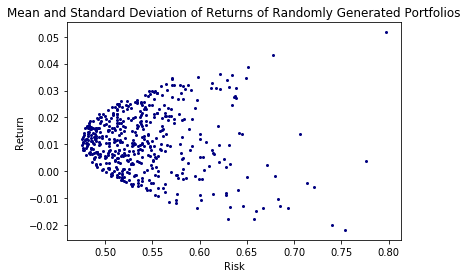

In [153]:
n_portfolios = 500

means, stds = np.column_stack([random_portfolio(return_vec) for x in range(n_portfolios)])

plt.plot(stds, means, 'o', markersize=2, color='navy')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.title('Mean and Standard Deviation of Returns of Randomly Generated Portfolios');

위에서 보듯이 random 하게 생성된 portfolio 의 mean return 과 risk 의 plot 은 포물선 평태를 띄며 이를 "Markovitz bullet" 이라고 부르며, 그 경계선을 효율적 전선(efficient frontier) 라고 부르는데 이 선상에 있는 포트폴리오는 동일한 기대치에서 가장 risk 가 낮은 것 들이다.

## Markowitz optimization 과 Efficient Frontier

위의 파란점으로 표시된 portfolio 중 efficient frontier 를 계산하는 것은 포트폴리오의 기대 수익 $R^Tw$ (mean return) 에 대해 $\sum_iw_i = 1$ 을 유지하면서 $w^TCw$ (portfolio 의 variance) 가 minimize 되도록 하는 것이다.  이 것은 scipy.optimise.minimize 함수로도 가능하지만 bounds, constraints, Lagrange multiplier 같은 것들을 정의해 주어야 하는 복잡한 문제가 있다. 다행히 convex solver 인 cvxopt package 는 이 문제들을 대신 해결해 준다.

아래의 mus vector 는 기대수익 mu 의 list 를 non-linear 하고 적절한 방식으로 생성한다. We will see later that we don‘t need to calculate a lot of these as they perfectly fit a parabola, which can safely be extrapolated for higher values.

### The problem

covariance $\sigma$ 인 주어진 portfolio allocation x 의 risk 는 $x^T\sigma x$ 로 측정할 수 있다. 우리의 목표는 $x^T\sigma x$ 를 minimize 하는 것이다. 이 목적 함수는 convex 함수이며 그 중에서도 quadratic program (QP) 이다. 따라서, 우리의 문제 정의는,
$$ minimize \ x^T\sigma x$$ 이고 (예, x = [0.3, 0.3, 0.3, 0.1]),

우리의 목표 수익 (goal return) 을 constraint $r_{avg}^T \ x \ge r_{min}$ 로 정의할 수 있다. (여기서 $r_{min}$ 은 최소 수익이다.) 또한, 우리가 $x_i$ 를 비율로 할 것이므로 $\sum_{i=1}^nx_i = 1$ 이며 $x\ge 0$ 인 conatraints 를 더할 수 있다. 정리하면,

$$ minimize \ x^T\sigma x$$

$$ subject\ to \  r_{avg}^T \ x \ge r_{min}$$

$$ \sum_{i=1}^nx_i = 1$$

$$x\ge 0$$

### Python 으로 문제 풀기

위 수식을 cvxopt 코딩으로 변경해 보자. 

$r_{avg}$ : returns = np.asmatrix(returns)

covariance $\sigma$ : S = opt.matrix(np.cov(returns)) 

Portfolio allocation problem 이 quadratic program 이므로, 다음 형태에 우리의 문제를 맞추어야 한다.

$$ minimize \ x^TPx + q^Tx$$

$$ subject\ to \ Gx \le h , \ Ax = b $$

우리 문제에 대응시키면, P = covariance 이고 q = 0 임.

P = opt.matrix(np.cov(returns)) 

q = opt.matrix(np.mean(returns, axis=1)) 

$ Gx \le h $ 를 이용하면, inequality constraints $ -x \le -x_{min}$ 과 $ -x \le 0$ 가 얻어진다.

$ Ax = b $ 를 이용하면 equality constraint $\sum_{i=1}^n x_i = 1$ 이 얻어진다.


In [154]:
mus = [10**(5.0 * 1/100 - 1.0) for t in range(100)]

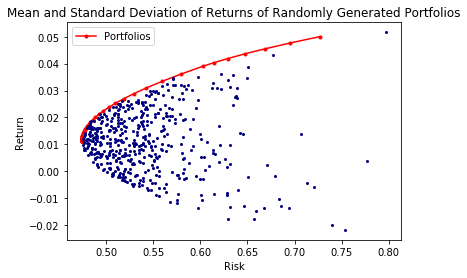

In [155]:
def optimal_portfolios(returns):
    n = len(returns)                                                     # n = 4 if n_assets = 4
    
    returns = np.asmatrix(returns)
  
    N = 100
    
    # Creating a list of returns to optimize the risk for
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices  (밀집행렬)
    S = opt.matrix(np.cov(returns))
  
    q = opt.matrix(np.mean(returns, axis=1))           # portfolio return 의 평균 [[ 0.53947116]]
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -q, G, h, A, b)['x'] for mu in mus]
    
    ## Calculate the risk and returns of the frontier
    returns = [blas.dot(q, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]

#     # CALCULATE the 2nd Degree polynomial of the frontier curve
#     m1 = np.polyfit(returns, risks, 2)
#     x1 = np.sqrt(m1[2]) / m1[0]
    # CALCULATE THE OPTIMAL PORTFOLIO
#     wt = solvers.qp(opt.matrix(x1 * S), -q, G, h, A, b)['x']
   
#     return np.asarray(wt), returns, risks
    return returns, risks

returns, risks = optimal_portfolios(return_vec)

plt.plot(risks, returns, '-o', markersize=3, color='red');
plt.legend(['Portfolios', 'Efficient Frontier']);

# 효율적 전선이 제대로 구해졌음을 random porfolio 의 risk, return 과 비교하기 위해 plot
plt.plot(stds, means, 'o', markersize=2, color='navy')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.title('Mean and Standard Deviation of Returns of Randomly Generated Portfolios');

위의 각 파란점은 서로 다른 portfolio 들을 표시하고, 바깥을 두른 붉은색 선은 효율적 전선(efficient frontier) 을 표시한다. 효율적 전선상의 포트폴리오들은 주어진 risk level 에서의 최적 포트폴리오들이다.

이 line 상의 최적 즉, 가장 효율적인 포트폴리오는 Sharpe ratio (잉여 return 과 volatility 의 비율)를 최대화하는 것들이다. 이 것은 가장 좋은 risk 대 reward trade-off 결정에 사용된다.

효율적 전선상에 위치한 포트폴리오 (위험자산으로 구성된)와 risk-free asset (R_F) 을 연결한 line 을 Capital Allocations Line (CAL, 자산배분선) 이라고 한다. CAL 의 기울기가 Sharpe ratio 이다. $$\frac{E[R_p-R_f]}{std[R_p-R_f]}$$  

Sharpe ratio 를 최대로 하기 위해서는 가장 가파른 CAL 을 찾아야 하는데, 이 것은 효율적 전선의 접선이다. 이런 이유로 효율적 전선을 접선 포트폴리오(tangent portfolio) 라고도 부른다.

     fun: -0.06813633751029277
     jac: array([  4.80163349e-02,  -5.79124317e-05,   4.24955972e-04,
        -5.05065545e-05])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([ 0.        ,  0.12587657,  0.11765106,  0.75647237])


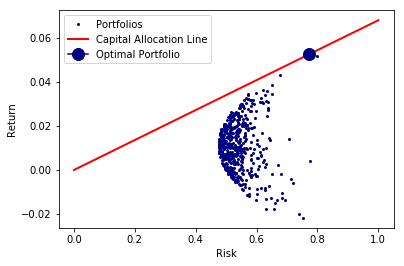

In [156]:
def maximize_sharpe_ratio(return_vec, risk_free_rate):
    """
    Finds the CAPM optimal portfolio from the efficient frontier 
    by optimizing the Sharpe ratio.
    """
    
    def find_sharpe(weights):
        
        means = [np.mean(asset) for asset in return_vec]
        
        numerator = sum(weights[m]*means[m] for m in range(len(means))) - risk_free_rate
        
        weight = np.array(weights)
        
        denominator = np.sqrt(weights.T.dot(np.corrcoef(return_vec).dot(weights)))   
        
        return numerator/denominator
    
    guess = np.ones(len(return_vec)) / len(return_vec)
    
    def objective(weights):
        return -find_sharpe(weights)
    
    # Set up equality constrained
    cons = {'type':'eq', 'fun': lambda x: np.sum(np.abs(x)) - 1} 

    # Set up bounds for individual weights
    bnds = [(0, 1)] * len(return_vec)
    
    results = optimize.minimize(objective, guess,
                            constraints=cons, bounds=bnds, 
                            method='SLSQP', options={'disp': False})
    
    return results

risk_free_rate = np.mean(R_F)

results = maximize_sharpe_ratio(return_vec, risk_free_rate)

print(results)

# Applying the optimal weights to each assset to get build portfolio
optimal_mean = sum(results.x[i]*np.mean(return_vec[i]) for i in range(len(results.x)))

optimal_std = np.sqrt(results.x.T.dot(np.corrcoef(return_vec).dot(results.x)))

# Plot of all possible portfolios
plt.plot(stds, means, 'o', markersize=2, color='navy')
plt.ylabel('Return')
plt.xlabel('Risk')

# Line from the risk-free rate to the optimal portfolio
eqn_of_the_line = lambda x : ( (optimal_mean-risk_free_rate) / optimal_std ) * x + risk_free_rate    

xrange = np.linspace(0., 1., num=11)

plt.plot(xrange, [eqn_of_the_line(x) for x in xrange], color='red', linestyle='-', linewidth=2)

# Our optimal portfolio
plt.plot([optimal_std], [optimal_mean], marker='o', markersize=12, color="navy")

plt.legend(['Portfolios', 'Capital Allocation Line', 'Optimal Portfolio']);

이제 선택된 최적 포트폴리오를 구성하는 개별 자산들의 return 과 risk 를 살펴보고 분산(diversification) 의 힘을 느껴보자.

In [157]:
for a in range(len(return_vec)): 
    print("Return and Risk of Asset", a, ":", np.mean(return_vec[a]), ",",np.std(return_vec[a]))
    
print("Return and Risk of Optimal Portfolio", optimal_mean, optimal_std)

Return and Risk of Asset 0 : -0.0395641360808 , 1.00078753752
Return and Risk of Asset 1 : 0.00838916739587 , 0.958009555142
Return and Risk of Asset 2 : 0.010353090377 , 0.981458372151
Return and Risk of Asset 3 : 0.0664786870526 , 0.989044689799
Return and Risk of Optimal Portfolio 0.0525633413953 0.771494551447


# Capital Market Line is CAL through market portfolio
기대한 대로, 우리가 찾아낸 최적 포트폴리오는 개별 자산보다 적당한 high return 과 더 적은 risk 를 갖게 되었다. 이론적으로 모든 투자자들은 이러한 최적 tangent portfolio 를 요구할 것이다. 만약 우리가 모든 투자자의 portfolio 를 모두 합한다면, 결국 market portfolio 가 될 것이다. 왜냐하면 모든 주식이 누군가에게 소유되고 있기 때문이다. 이 것은 tangent portfolio 가 market portfolio 임을 뜻하고 수요과 공급이 일치함을 뜻한다.

risk-free asset 이 portfolio 에 더해지면, Capital Asset Line 이 Capital Market Line(CML) 로 전환된다. CAPM 에 의하면 CML 의 오른쪽에 놓여진 어떤 주식이나 portfolio 도 분산가능한 risk 를 포함하고 있고 따라서 not efficient 하다.

각 주식의 beta 를 기대 수익 (expected return) 과 mapping 시키면 Security Markets Line 이 나온다. CAPM 에 의해 예측되는 실제 주식의 return 과 expected return 의 차이가 alpha 라고 알려져 있다.

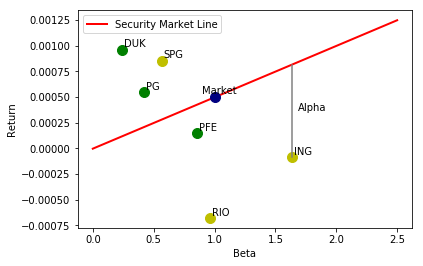

In [158]:
risk_free_rate = np.mean(R_F)

# SML(Security Map Line) 을 연결하는 두개의 좌표는 (0, risk-free rate) 와(1, market return) 이다. (가로축 : beta, 세로축: return)
# 선의 기울기가 (Market 평균 return - risk_free_rate) / 1.0 이므로 공식으로 표현하면,
eqn_of_the_line = lambda x : ( (np.mean(M)-risk_free_rate) / 1.0) * x + risk_free_rate   
xrange = np.linspace(0., 2.5, num=2)         # num : number of samples
plt.plot(xrange, [eqn_of_the_line(x) for x in xrange], color='red', linestyle='-', linewidth=2)

plt.plot([1], [np.mean(M)], marker='o', color='navy', markersize=10)
plt.annotate('Market', xy=(1, np.mean(M)), xytext=(0.9, np.mean(M)+0.00004))

# 이제 경기에 민감(cyclical industries) 한 주식들이 더 높은 beta 값을 가지는지 비교해 보자

# 경기에 민감하지 않은 주식은 Procter & Gamble (PG), Duke Energy(DUK), Pfizer (PFE) 세 종목 선정

non_cyclical = ["PG", "DUK", "PFE"]

def multi_returns(start, end, symbols):
    columns = []
    for symbol, market in symbols:
        columns.append(symbol)
        
    df = pd.DataFrame(columns=columns)
    
    for symbol, market in symbols:
        df[symbol] = pd.DataFrame(get_price_data({'q': symbol, 'i': "86400", 'x': market, 'p': "10Y" }))['Close'].loc[start : end]
    
    return df
        
non_cyclical_returns = multi_returns(start, end, [("PG","NYSE"), ("DUK","NYSE"), ("PFE","NYSE")]).pct_change()[1:]

exog = M.values[:250]

non_cyclical_betas = [regression.linear_model.OLS(non_cyclical_returns[asset].values, sm.add_constant(exog)).fit().params[1] 
                      for asset in non_cyclical]

for asset, beta in zip(non_cyclical, non_cyclical_betas):
    plt.plot([beta], [np.mean(non_cyclical_returns[asset])], marker='o', color='g', markersize=10)
    plt.annotate(
        asset,
        xy=(beta, np.mean(non_cyclical_returns[asset])),
        xytext=(beta + 0.015, np.mean(non_cyclical_returns[asset]) + 0.000025)
    )
    
#  경기에 민감한 주식은 Rio Tinto (RIO), Simon Property(SPG), ING (ING) 세 종목 선정
cyclical = ['RIO', 'SPG', 'ING']

cyclical_returns = multi_returns(start, end, [("RIO","NYSE"), ("SPG","NYSE"), ("ING","NYSE")]).pct_change()[1:]

cyclical_betas = [regression.linear_model.OLS(cyclical_returns[asset].values, sm.add_constant(exog)).fit().params[1] 
                      for asset in cyclical]

for asset, beta in zip(cyclical, cyclical_betas):
    plt.plot([beta], [np.mean(cyclical_returns[asset])], marker='o', color='y', markersize=10)
    plt.annotate(
        asset,
        xy=(beta, np.mean(cyclical_returns[asset])),
        xytext=(beta + 0.015, np.mean(cyclical_returns[asset]) + 0.000025)
    )

    # alpha 를 그린다. alpha 는 기대수익과 실제 수익의 차이 이다.
plt.plot(
    [cyclical_betas[2], cyclical_betas[2]],
    [np.mean(cyclical_returns.iloc[:, 2]), eqn_of_the_line(cyclical_betas[2])],
    color='grey'
)
plt.annotate(
    'Alpha',
    xy=(
        cyclical_betas[2] + 0.05,
        (eqn_of_the_line(cyclical_betas[2])-np.mean(cyclical_returns.iloc[:,2]))/2+np.mean(cyclical_returns.iloc[:,2])
    ),
    xytext=(
        cyclical_betas[2] + 0.05,
        (eqn_of_the_line(cyclical_betas[2])-np.mean(cyclical_returns.iloc[:,2]))/2+np.mean(cyclical_returns.iloc[:,2])
    )
)

plt.xlabel("Beta")
plt.ylabel("Return")

plt.legend(['Security Market Line']);

## scipy 를 이용한 수학적 최적화

위에서 cvxopt sublibrary 를 이용해 구했던 최적 portfolio 를 scipy.minimize 를 이용하여 구해보자.

minimize 의 parameter 로 사용할 최소화할 목적함수 (objective function to minimize), initial guess, Bounds for variables (min, max), constraints 를 정의한다.

In [159]:
from scipy.optimize import minimize

def get_ret_vol_sr(weights):            #  최소화할 목적함수
    weights = np.array(weights)
    ret = np.sum(return_vec.mean() * weights) - np.mean(R_F)
    vol = np.sqrt(np.dot(weights.T, np.dot(np.corrcoef(return_vec), weights)))
    sr = ret / vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    return np.sum(weights) - 1

cons = ({'type': 'eq', 'fun': check_sum})

bounds = ((0, 1), (0, 1), (0, 1), (0, 1))                        # 4 개 asset 이므로 각 asset 의 min, max

initial_guess = [0.25, 0.25, 0.25, 0.25]

In [160]:
np.corrcoef(return_vec)

array([[ 1.        , -0.03128347, -0.03240894, -0.02747008],
       [-0.03128347,  1.        , -0.01339235, -0.03941708],
       [-0.03240894, -0.01339235,  1.        ,  0.00657386],
       [-0.02747008, -0.03941708,  0.00657386,  1.        ]])

In [161]:
get_ret_vol_sr([0.25, 0.25, 0.25, 0.25])

array([ 0.01141767,  0.48251968,  0.02366261])

In [162]:
opt_results = minimize(neg_sharpe, initial_guess, method='SLSQP', bounds=bounds, constraints=cons)

In [163]:
opt_results

     fun: -0.023667771811444277
     jac: array([ -2.28147954e-04,  -1.57499453e-04,   3.33426055e-04,
         9.11036041e-05])
 message: 'Optimization terminated successfully.'
    nfev: 19
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([ 0.25541673,  0.25372731,  0.24285108,  0.24800488])

In [169]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')   

df = pd.DataFrame(get_price_data({'q': "AAPL", 'i': "86400", 'x': "NASD", 'p': "10Y" }))['Close'].loc[start : end]
df.index = pd.to_datetime(df.index.date)
aapl = df

df = pd.DataFrame(get_price_data({'q': "CSCO", 'i': "86400", 'x': "NASD", 'p': "10Y" }))['Close'].loc[start : end]
df.index = pd.to_datetime(df.index.date)
cisco = df

df = pd.DataFrame(get_price_data({'q': "IBM", 'i': "86400", 'x': "NYSE", 'p': "10Y" }))['Close'].loc[start : end]
df.index = pd.to_datetime(df.index.date)
ibm = df

df = pd.DataFrame(get_price_data({'q': "AMZN", 'i': "86400", 'x': "NASD", 'p': "10Y" }))['Close'].loc[start : end]
df.index = pd.to_datetime(df.index.date)
amzn = df

In [170]:
portfolio = pd.DataFrame({"AAPL" : aapl, "CSCO": cisco, "IBM": ibm, "AMZN": amzn})

In [171]:
opt_results

     fun: -0.023667771811444277
     jac: array([ -2.28147954e-04,  -1.57499453e-04,   3.33426055e-04,
         9.11036041e-05])
 message: 'Optimization terminated successfully.'
    nfev: 19
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([ 0.25541673,  0.25372731,  0.24285108,  0.24800488])

In [173]:
get_ret_vol_sr(opt_results.x)

array([ 0.01141767,  0.4824144 ,  0.02366777])

In [174]:
n_assets = 4
n_obs = 2000
return_vec = np.random.randn(n_assets, n_obs)
return_vec

array([[ 0.83301604, -0.04252685,  0.54447436, ...,  0.61909092,
         0.30157821,  0.29163689],
       [ 1.59878493, -0.60968539, -1.3777955 , ...,  0.35778142,
        -0.66862132,  0.93639815],
       [-0.21091914, -0.3263479 , -0.75566617, ...,  1.27741573,
        -1.21914126,  0.34815559],
       [ 0.4536745 ,  1.24442713, -0.29147015, ..., -0.34697876,
         1.93122363,  0.38918679]])

#  Arbitrage Pricing Theory (차익거래 가격결정 이론)

CAPM 이 폭넓게 사용되고 연구되었지만, 많은 약점을 가지고 있다. 엄격하고 제한된 가정이 필요하다. 반면, APT 는 CAPM 의 일반화된 model 이다. 즉, 모형이 요구하는 가정이 더 적다는 뜻이다. CAPM과 달리 APT에서는 모든 시장 참여자들이 최적화를 하고 있다는 가정이 필요 없으며 자산의 수익률이 정규분포를 따를 필요도 없다. asset 들이 market risk 외의 더 다양한 risk 에 노출될 수 있고 투자자들이 단순히 mean 과 variance 외의 다른 것도 고려할 수 있다.

APT 는 linear factor model 을 이용하여 return 을 표현하는 주요 자산가격 결정 이론이다.

$$R_i = a_i + b_{i1} F_1 + b_{i2} F_2 + \ldots + b_{iK} F_K + \epsilon_i$$

factor 란 어떤 특성에 의해 완전히 결정되는 return stream 이다. 예를들어, CAPM 은 오직 한개의 factor - market return 을 가지고 있다.
rate of return 을 위와 같이 modeling 하면 다음 형태의 기대 수익을 도출할 수 있다.

$$ E(R_i) = R_F + b_{i1} \lambda_1 + b_{i2} \lambda_2 + \ldots + b_{iK} \lambda_K $$

여기서 $R_F$ 는 risk-free rate 이고 $\lambda_j$ 는 risk premium (the return in excess of the risk-free rate - for factor $j$) 이다. 이 premium 은 투자자들이 higher risk 에 대한 보상으로 higher return 을 요구하기 때문에 생겨난다.

이러한 factor 들의 risk premia 는 Fama-Macbeth regression 으로 계산한다. 물론, $\lambda_j$를 계산하는 여러 방법이 있다.

## Arbitrage (차익거래)

이제 expected return 을 계산하는 방법을 알았으니 차익거래에 관하여 좀 더 기술적으로 알아본다. 많은 종목의 주식들이 있다. $\{\lambda_i\}$ 를 계산하는데 제각기 다른 방법을 사용한다면 결과가 consistent 하지 않을 것이다. 결과가 inconsistent 하면 차익거래기회 (*arbitrage opportunity* )가 생긴다. 차익거래는 net investment 없이 risk 없는 이익을 얻는 방법이다. 이 경우, net investment 없이 *expected* positive return 을 가지는 risk-free operation 이 있다는 것을 의미한다. 차익거래는 risk 가 주식 종목에 걸쳐 일관성있게 가격이 매겨지지 않아, 기대 수익이 inconsistent 할 때 발생한다.

예를 들어 다음 연도에 0.2 의 수익률이 기대되는 asset 이 있고, 시장에 대한 $\beta$ 가 1.2 이다. market 의 기대 수익률이 0.1 이고 1 년만기 채권의 risk free rate 가 0.05 라고 하면, ATP 모델은 기대 수익률이 다음과 같다.

$$ R_F + \beta \lambda = 0.05 + 1.2 (0.1 - 0.05) = 0.11$$

이 것은 asset 이 0.2 의 수익률을 보일 것이라는 예측과 다르다. 따라서 우리는 \$100 의  asset 을 사고, \$120 의 market 을 short 하고, \$20 의 bond 를 산다. 이렇게 하면 net money 투자 없이 system risk 노출을 없애면서 (market-neutral), $0.2(100) - 0.1(120) + 0.05(20) = 9$ dollars 를 연말에 벌 수 있다.

APT 는 price 가 shift 되어 arbitrage 기회가 사라질 때까지 이러한 기회의 잇점을 가질 수 있다고 가정한다. 그 것은, 충분한 숫자의 인내심 있고 자본력 있는 차익거래투자자 (arbitrageurs) 가 있다고 가정한고 주식 가격결정에서 경험적 factor model 의 사용을 정당화 한다. 만약 모델이 inconsistent 하면 차익거래 기회가 있을 것이고, 가격은 조정될 것이다.

## Goes Both Ways

$E(R_i)$ 을 정확히 아는 것은 믿기힘들 정도로 힘들지만, 이 모델은 만약 market 에 차익거래 기회가 없다면 기대 수익이 어떻게 될 것인가 말해준다.
이 것은 factor model ranking system 을 기초로 한 전략의 기반이 된다. asset 의 기대 수익에 대한 model 이 있다면, 기대 performance 에 기초하여 그 asset 들을 rank 할 수 있을 것이고 이 정보를 trading 에 사용할 수 있을 것이다.